In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv("icudata.csv")
df = pd.DataFrame(data)

In [3]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1177 rows and 51 columns


In [4]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [6]:
df.dtypes

group                         int64
ID                            int64
outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         

In [11]:
df.groupby('outcome').size()

outcome
0.0    1017
1.0     159
dtype: int64

In [23]:
df.astype({'group': 'str', 'ID': 'str', 'outcome': 'boolean'}).dtypes

group                        object
ID                           object
outcome                     boolean
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         

In [7]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by= 'count', ascending = False)

,count,%
PCO2,294,24.978760
PH,292,24.808836
Basophils,259,22.005098
Lactic acid,229,19.456245
BMI,215,18.266780
Creatine kinase,165,14.018692
Lymphocyte,145,12.319456
Neutrophils,144,12.234494
Urine output,36,3.058624
INR,20,1.699235


In [24]:
numerics = ['int64','float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
group,1177.0,1.299065,0.458043,1.000000,1.000000,1.000000,2.000000,2.000000
ID,1177.0,150778.120646,29034.669513,100213.000000,125603.000000,151901.000000,176048.000000,199952.000000
outcome,1176.0,0.135204,0.342087,0.000000,0.000000,0.000000,0.000000,1.000000
age,1177.0,74.055225,13.434061,19.000000,65.000000,77.000000,85.000000,99.000000
gendera,1177.0,1.525064,0.499584,1.000000,1.000000,2.000000,2.000000,2.000000
BMI,962.0,30.188278,9.325997,13.346801,24.326461,28.312474,33.633509,104.970366
hypertensive,1177.0,0.717927,0.450200,0.000000,0.000000,1.000000,1.000000,1.000000
atrialfibrillation,1177.0,0.451147,0.497819,0.000000,0.000000,0.000000,1.000000,1.000000
CHD with no MI,1177.0,0.085811,0.280204,0.000000,0.000000,0.000000,0.000000,1.000000
diabetes,1177.0,0.421410,0.493995,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
%matplotlib inline

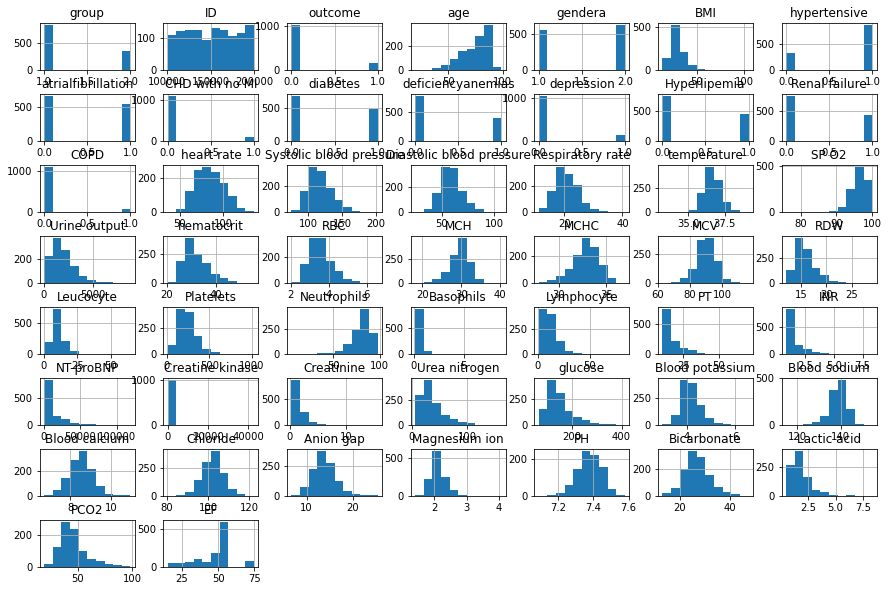

In [25]:
df_numeric.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);